In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# constants 
path = "E:\\Andreea\\Master\\Thesis\\Git\\TheOne\\SmartuistWrapper\\tapResultParticipants.csv"
pathH = "C:\\Users\\huber\\OneDrive\\Dokumenty\\thesis-hubert\\unity\\SmartuistWrapper\\tapResultParticipants.csv"
playerNr = 46
players = [2, 7, 11, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, 54, 58, 62] #26, 58
males = [0, 4, 5 , 6, 7, 12, 14, 15]
females = [1, 2, 3, 8, 9, 10, 11, 13]
gender = [0, 1, 1, 1, 0, 0, 0,  0,  1, 1, 1, 1, 0, 1, 0, 0]
armLength = np.array([28, 23.5, 27, 27, 28, 27, 26, 28,  23, 26, 24, 26, 27, 24, 27, 29])
height = np.array([1.7, 1.73, 1.65, 1.72, 1.77, 1.82, 181, 1.79, 1.6, 1.7, 1.7, 1.65, 1.8, 1.78, 184, 1.85 ])
idxLength = 28
idxGain = 29

In [3]:
def readFromFile(path):
    results = [0] * 100
    f = open(path, "r")
    player = -1
    for x in f:
        line = x.split(',')
        if len(line) == 31:
            if int(line[0]) == player:
                results[player].append(line)
            else:
                player = int(line[0])
                results[player] = []
                results[player].append(line)
    f.close()
    return results


# a list with the results at idx for the given player    
def getResultPerPlayer(p, results, idx, unique ):
    tmp = results[p]
    values = []
    for words in tmp:
        values.append(float(words[idx]))
    if (unique == True):
        values =  [x for i, x in enumerate(values) if i == values.index(x)]
    return values

# sort list1 - use the indexes of the sorted list1 to rearrage list2    
def getCombinedPlot(list1, list2):
    idx   = np.argsort(list1)
    list1 = np.array(list1)[idx]
    list2 = np.array(list2)[idx]
    return (list1, list2)

# get avg effort and distance per body parts
def EffortPerBodyPartPerPlayer(p, results, batchSize):
    effortBodyParts = [ 0 for i in range(7)]
    distBodyParts = [ 0 for i in range(7)]
    tmp = results[p]
    counter = 0
    
    for words in tmp:            
        for i in range (7):
            effortBodyParts[i] += float(words[21+i])
            distBodyParts[i] += float(words[14+i])            
        counter = counter + 1

    for i in range(7):
        effortBodyParts[i] /= counter
    return (effortBodyParts, distBodyParts)

def getResults(results, players):
    efforBodyParts = []
    distBodyParts = []
    for p in players:
        tmp = results[p]
        effort, dist = EffortPerBodyPartPerPlayer(p, results, 10)
        efforBodyParts.append(effort)
        distBodyParts.append(dist)
    return ( efforBodyParts, distBodyParts)

In [4]:
results = readFromFile(path)
efforBodyParts, distBodyParts = getResults(results, players)

In [5]:
# get best length for player p - as it was used in the experiment 
p = 46

lengths = getResultPerPlayer(p, results, idxLength, True)
gain = getResultPerPlayer(p, results, idxGain, True)

for i in range(len(lengths)-1, 1, -1):   
    lengths[i] = lengths[i-1]
gain, lengths = getCombinedPlot(gain, lengths)

 # get avg length for the top 3 values of gain
avg = sum(lengths[-3:]) / 3
print(avg)

4.902864666666666


In [17]:
def getResultsPerPlayerType(results, players):
    l = []
    avgGain = []
    avgMvmTime = []
    effortAvg = []
    distAvg = []
    for p in range(len(players)):
        lengths = getResultPerPlayer(players[p], results, idxLength, True)
        gain = getResultPerPlayer(players[p], results, idxGain, True)
        mvmTime = getResultPerPlayer(players[p], results, 10, True)

        for i in range(len(lengths)-1, 1, -1):   
                lengths[i] = lengths[i-1]

        gain, lengths = getCombinedPlot(gain, lengths) #sort lengths based on gain 
        gain = getResultPerPlayer(players[p], results, idxGain, True)
        gain, mvmTime = getCombinedPlot(gain, mvmTime) #sort mvmTime based on gain 
        
        # get avg length for the top 3 values of gain
        avg = sum(lengths[-3:]) / 3
        effortAvg.append(efforBodyParts[p])
        distAvg.append(distBodyParts[p])
        avgGain.append(sum(gain) / len(gain))
        avgMvmTime.append(sum(mvmTime[-3:]) / 3)

        l.append(avg)
    return (np.array(l), np.array(avgGain), np.array(avgMvmTime), np.array(effortAvg), np.array(distAvg))

In [18]:
# get results per gender

l, avgGain, avgMvmTime, effortAvg, distAvg = getResultsPerPlayerType(results, players)

multiplierF = list(l[females])
multiplierM = list(l[males])

avgGainF = list(avgGain[females])
avgGainM = list(avgGain[males])

avgMvmTimeF = list(avgMvmTime[females])
avgMvmTimeM = list(avgMvmTime[males])

effortF = list(effortAvg[females])
effortM = list(effortAvg[males])

distF = list(distAvg[females])
distM = list(distAvg[males])

armLengthF = list(np.array(armLength[females]))
armLengthM = list(armLength[males])

armLengthVr = np.array([l[i] * armLength[i] for i in range(len(l))])
armLengthVrM = list(armLengthVr[males])
armLengthVrF = list(armLengthVr[females])

heightF = list(height[females])
heightM = list(height[males])

In [19]:
      
print("Avg best length:", sum(l) / len(l) )
print("Avg male best length:", sum(multiplierM) / len(multiplierM)  )
print("Avg female best length:", sum(multiplierF) / len(multiplierF) )

print(multiplierF)
print(multiplierM)

Avg best length: 4.543219729166666
Avg male best length: 5.215382458333334
Avg female best length: 3.871057
[3.899167666666667, 2.4882649999999997, 3.390385666666667, 6.204683333333334, 3.0021586666666664, 4.2141090000000005, 4.902864666666666, 2.8668219999999995]
[4.938574, 5.271202333333334, 5.0918746666666665, 7.186349, 4.136910333333334, 5.445905666666667, 6.953631000000001, 2.698612666666667]


In [21]:
from scipy.stats import pearsonr, spearmanr, kendalltau

def findCorelation(data1, data2, label=""):
    print(label)
    covariance = np.cov(data1, data2)
    #print(covariance)

    # calculate spearman's correlation
    coef, p = spearmanr(data1, data2) 
    print('Spearmans correlation p-value: %.7f' % p)
       
    # calculate kendall's correlation
    coef, p = kendalltau(data1, data2)
   # print('Kendall correlation coefficient: %.3f' % coef)
    print('Kendall correlation p-value: %.7f' % p)
    print(" ")


effortF = np.array(effortF)
effortM = np.array(effortM)


# findCorelation(armLengthVrF, avgMvmTimeF, "ArmLengthVR/MvmTime Female: ")  #yes kendal: top 3 mvm time, 0.08 avg all mvm time  
# findCorelation(armLengthVrM, avgMvmTimeM, "ArmLengthVR/MvmTime Male: ")  #NOP

# findCorelation(multiplierF, avgMvmTimeF, "ArmLengthMultiplier/MvmTime Female: ")  # fes for kendall   
# findCorelation(multiplierM, avgMvmTimeM, "ArmLengthMultiplier/MvmTime Male: ") # nop - worse then armLenghtVr

# findCorelation(avgGain, armLengthVr, "ArmLengthVR/Gain: ") # nop 
# findCorelation(avgGainF, multiplierF, "multiplier /Gain Female: ") # 0.08  
# findCorelation(avgGainM, multiplierM, "multiplier/Gain Male: ") # nop 

# findCorelation(l, avgMvmTime, "ArmLengthMultiplier/MvmTime : ") # nop 

# findCorelation(armLengthVrF, heightF, "ArmLengthVR/Height female: ") # nop 
# findCorelation(armLengthVrM, heightM, "ArmLengthVR/Height Male: ") #nop

# findCorelation(multiplierF, heightF, "length multipler/Height female: ")  #nop
# findCorelation(multiplierM, heightM, "length multipler/Height Male: ") #nop
# findCorelation(l, height, "length multipler/Height : ") 

# findCorelation(armLength, height, "arm length/Height : ") # nop
# findCorelation(armLengthF, heightF, "arm length/Height F : ") #nop
# findCorelation(armLengthM, heightM, "arm length/Height M: ") #nop

# findCorelation(armLength, armLengthVr, "armLength/ArmLengthVR : ") #nop
# findCorelation(armLengthVr, height, "armLengthVR/height : ") #nop

# body, leftUpperArm, RightUpperArm, RightFoot, LeftFoot, LeftHand, RightHand
findCorelation(effortM[:,0], multiplierM, "multiplier/Effor body Male: ") # nop 
findCorelation(effortM[:,1], multiplierM, "multiplier/Effor leftUpperArm Male: ") # nop 
findCorelation(effortM[:,2], multiplierM, "multiplier/Effor RightUpperArm Male: ") # nop 
findCorelation(effortM[:,3], multiplierM, "multiplier/Effor RightFoot Male: ") # nop 
findCorelation(effortM[:,4], multiplierM, "multiplier/Effor LeftFoot Male: ") # nop 
findCorelation(effortM[:,5], multiplierM, "multiplier/Effor LeftHand Male: ") # yes 
findCorelation(effortM[:,6], multiplierM, "multiplier/Effor RightHand Male: ") # yes Spermans 


findCorelation(effortF[:,0], multiplierF, "multiplier/Effor body Female: ") # yes 
findCorelation(effortF[:,1], multiplierF, "multiplier/Effor leftUpperArm Female: ") # yes 
findCorelation(effortF[:,2], multiplierF, "multiplier/Effor RightUpperArm Female: ") # yes 
findCorelation(effortF[:,3], multiplierF, "multiplier/Effor RightFoot Female: ") # yes 
findCorelation(effortF[:,4], multiplierF, "multiplier/Effor LeftFoot Female: ") # yes 
findCorelation(effortF[:,5], multiplierF, "multiplier/Effor LeftHand Female: ") # nop 
findCorelation(effortF[:,6], multiplierF, "multiplier/Effor RightHand Female: ") # nop 

print(" ")

multiplier/Effor body Male: 
Spearmans correlation p-value: 0.5309229
Kendall correlation p-value: 0.4579011
 
multiplier/Effor leftUpperArm Male: 
Spearmans correlation p-value: 0.7357649
Kendall correlation p-value: 0.8045709
 
multiplier/Effor RightUpperArm Male: 
Spearmans correlation p-value: 0.6932388
Kendall correlation p-value: 0.6206907
 
multiplier/Effor RightFoot Male: 
Spearmans correlation p-value: 0.7357649
Kendall correlation p-value: 0.8045709
 
multiplier/Effor LeftFoot Male: 
Spearmans correlation p-value: 0.6103444
Kendall correlation p-value: 0.4579011
 
multiplier/Effor LeftHand Male: 
Spearmans correlation p-value: 0.0709877
Kendall correlation p-value: 0.0477612
 
multiplier/Effor RightHand Male: 
Spearmans correlation p-value: 0.0101755
Kendall correlation p-value: 0.0259525
 
multiplier/Effor body Female: 
Spearmans correlation p-value: 0.0038503
Kendall correlation p-value: 0.0133476
 
multiplier/Effor leftUpperArm Female: 
Spearmans correlation p-value: 0.002

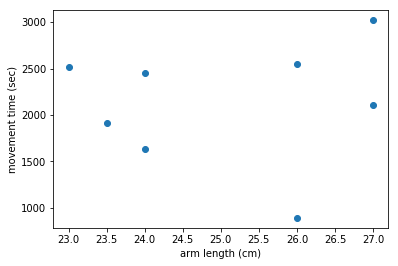

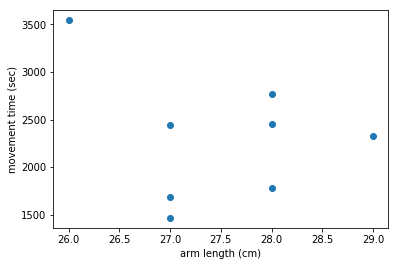

In [23]:
plt.plot(armLengthF, avgMvmTimeF, 'o')
plt.xlabel("arm length (cm)")
plt.ylabel("movement time (sec)")
plt.show()

plt.plot(armLengthM, avgMvmTimeM,  'o')
plt.xlabel("arm length (cm)")
plt.ylabel("movement time (sec)")
plt.show()

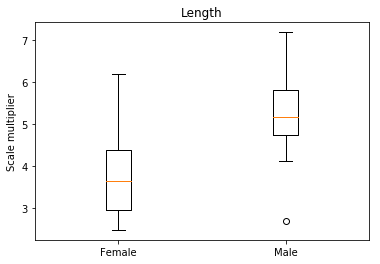

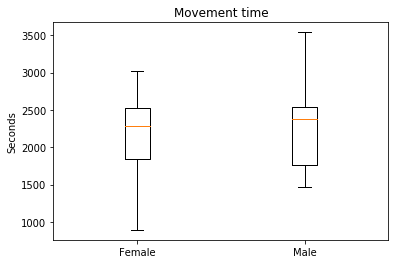

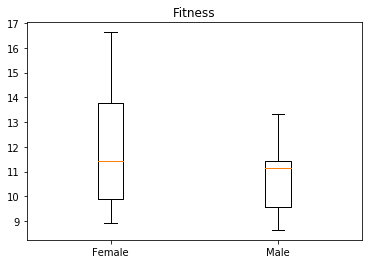

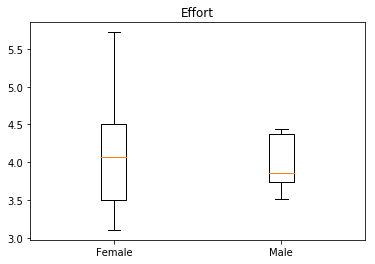

In [24]:
plt.boxplot([ multiplierF, multiplierM ], labels= [ "Female", "Male"])
plt.title("Length")
plt.ylabel("Scale multiplier")
plt.show()

plt.boxplot([avgMvmTimeF, avgMvmTimeM], labels= ["Female", "Male"])
plt.title("Movement time")
plt.ylabel("Seconds")
plt.show()

plt.boxplot([avgGainF, avgGainM], labels= ["Female", "Male"])
plt.title("Fitness")
plt.ylabel("")
plt.show()

plt.boxplot([effortF[:,0], effortM[:,0]], labels= ["Female", "Male"], showfliers=False)
plt.title("Effort")
plt.ylabel("")
plt.show()

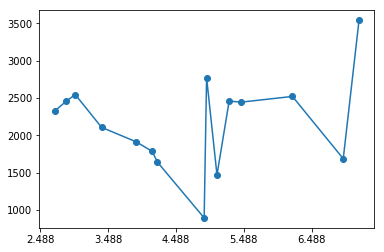

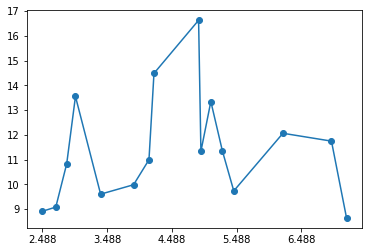

In [26]:
# combine plot for length and movement time

length2, gain2 = getCombinedPlot(l, avgGain)
length2, mvmTim2 = getCombinedPlot(l, avgMvmTime)

plt.xticks(np.arange(min(length2), max(length2)+1, 1.0))
plt.plot(length2[1:], mvmTim2[1:], 'o-')
plt.show()

plt.xticks(np.arange(min(length2), max(length2)+1, 1.0))
plt.plot(length2, gain2, 'o-')
plt.show()